In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_csv("homeprices MultipleRegression.csv")
data

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


## preprocessing

In [3]:
# 1. print dataset check missing vales
data.isna().sum()

area        0
bedrooms    1
age         0
price       0
dtype: int64

In [4]:
med=data.bedrooms.median()
data['bedrooms'] =data['bedrooms'].fillna(med)

In [ ]:
# change float numbers into int numbers
math.ceil(4.8)
math.floor(4.8)
round(4.8)
int(4.8)

In [5]:
data

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


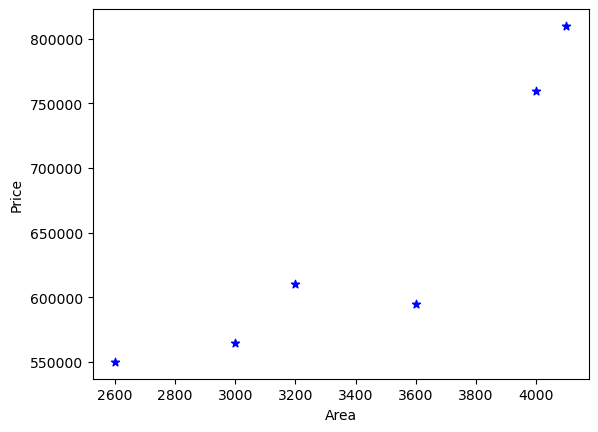

In [8]:
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(data.area,data.price, color="blue", marker="*")

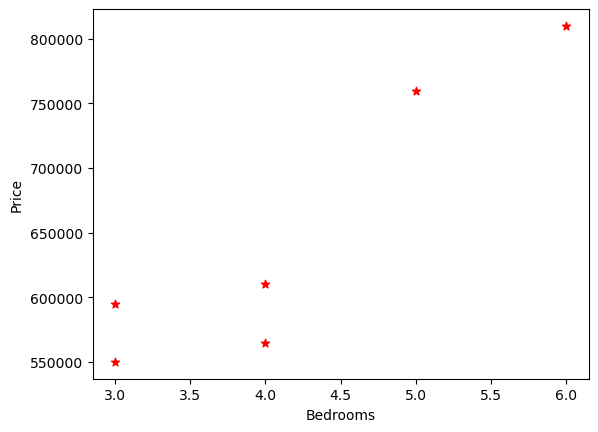

In [9]:
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.scatter(data.bedrooms,data.price, color='red',marker='*')

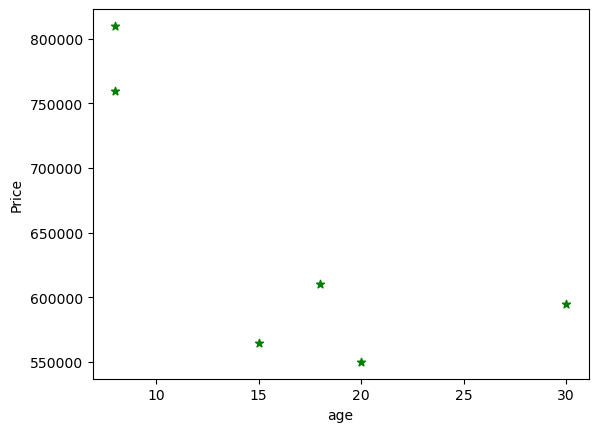

In [11]:
plt.xlabel('age')
plt.ylabel('Price')
plt.scatter(data.age,data.price, color='green',marker='*')

In [12]:
correlation=data.corr()
correlation

,area,bedrooms,age,price
area,1.000000,0.751710,-0.445300,0.901476
bedrooms,0.751710,1.000000,-0.877221,0.919803
age,-0.445300,-0.877221,1.000000,-0.734167
price,0.901476,0.919803,-0.734167,1.000000


<Axes: >

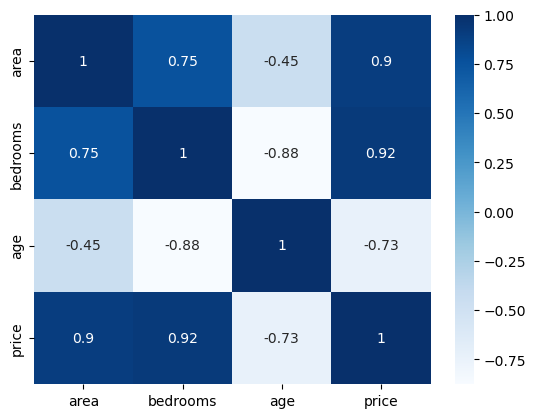

In [14]:
sns.heatmap(correlation, annot=True, cmap='Blues')

In [17]:
x=data.drop('price', axis=1)
y=data['price']

In [18]:
x

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.0,18
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8


In [20]:
y

0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64

In [21]:
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [22]:
model.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [23]:
model.intercept_

221323.00186540384

In [27]:
model.predict([[4000,3,10]])

C:\Program Files\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([707422.23078143])

In [28]:
y_pred=model.predict(x)

In [29]:
y_pred

array([518217.63297611, 602590.07937407, 615307.4140366 , 597962.89583192,
       760663.42675457, 795258.55102673])

In [30]:
pd.DataFrame({'True values': y, 'Predicted values':y_pred})

,True values,Predicted values
0,550000,518217.632976
1,565000,602590.079374
2,610000,615307.414037
3,595000,597962.895832
4,760000,760663.426755
5,810000,795258.551027


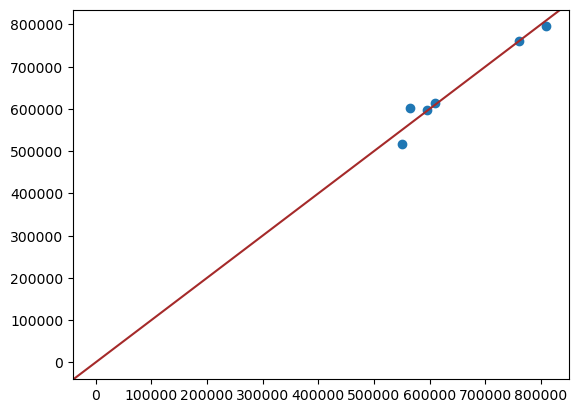

In [31]:
plt.axline([0,0],[1,1],c= 'brown')
plt.scatter(y,y_pred)

In [ ]:
# ax.plot([0,1], )

### Finding score of the model
#### r2 score= 1-((y-y_pred) / (y-y_mean))

In [35]:
model.score(x,y)   # r2 score or r-squared score

0.9550196399325819

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
mean_squared_error(y,y_pred)

446305128.22449297

### Saving the model

#### Pickle

In [36]:
import pickle

In [37]:
with open('regression_pickle','wb') as f:
    pickle.dump(model, f)

In [39]:
with open ('regression_pickle','rb') as s:
          reg_loaded= pickle.load(s)

In [40]:
reg_loaded.predict([[4000,3,10]])

C:\Program Files\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([707422.23078143])

#### Joblib

In [41]:
import joblib

In [42]:
joblib.dump(model, 'joblib model')
joblib_reloaded= joblib.load('joblib model')

In [43]:
joblib_reloaded.predict([[4000,3,10]])

C:\Program Files\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([707422.23078143])